# Time Series Forecasting

`WIP`

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib import animation
from IPython import display
from scipy.stats import spearmanr, pearsonr

In [20]:
from mightypy.ml.utils import moving_window_matrix

## Auto Correlation

In [148]:
data = np.linspace(1,100, 100)
window = 25
lags = 1

In [149]:
def calc_auto_corr(data, **kwargs):
    mat = moving_window_matrix(data,**kwargs)
    auto_corr = []
    width = mat.shape[1]
    for i in range(1,width):
        auto_corr.append(pearsonr(mat[...,width-1], mat[...,i])[0])
    
    return auto_corr

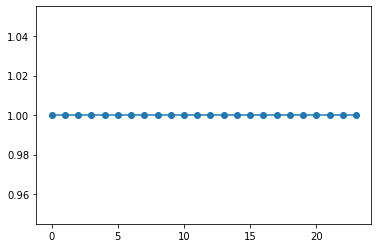

In [151]:
auto_corr = calc_auto_corr(data, window=window, lag=lag)
    
plt.plot(auto_corr, '-o')
print()

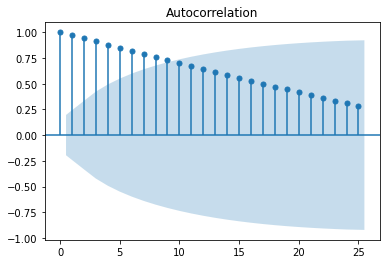

In [133]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data, lags = 25)
print()

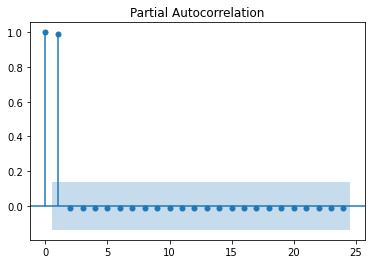

In [116]:
plot_pacf(data)
print()

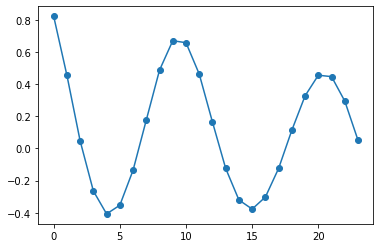

In [93]:
import statsmodels.api as sm
data = sm.datasets.sunspots.load_pandas().data

data.set_index('YEAR', inplace=True)

mat = moving_window_matrix(data.values.ravel(), window=25, lag=1)

auto_corr = []
for i in range(1,mat.shape[1]):
    auto_corr.append(np.corrcoef(mat[...,0], mat[...,i])[0][1])
    
plt.plot(auto_corr, '-o')

## Auto Regression Model

In [91]:
from statsmodels.tsa.ar_model import AutoReg

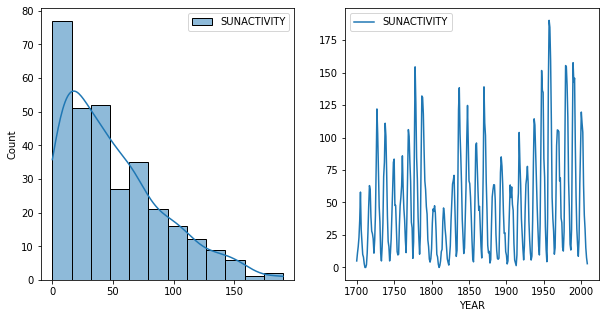

In [49]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

sns.histplot(data, kde=True, ax=ax[0])
sns.lineplot(data=data, ax=ax[1])
plt.show()